# Single File

In [39]:
number = 1

file_1 = f'/Volumes/SD/DSPS/temp_fasrc/trainData_1/grid_h5_{number}.h5'
file_2 = f'/Volumes/SD/DSPS/tmp/MLdataNumbers/{number}.h5'

Shapes match!
Data does not match!


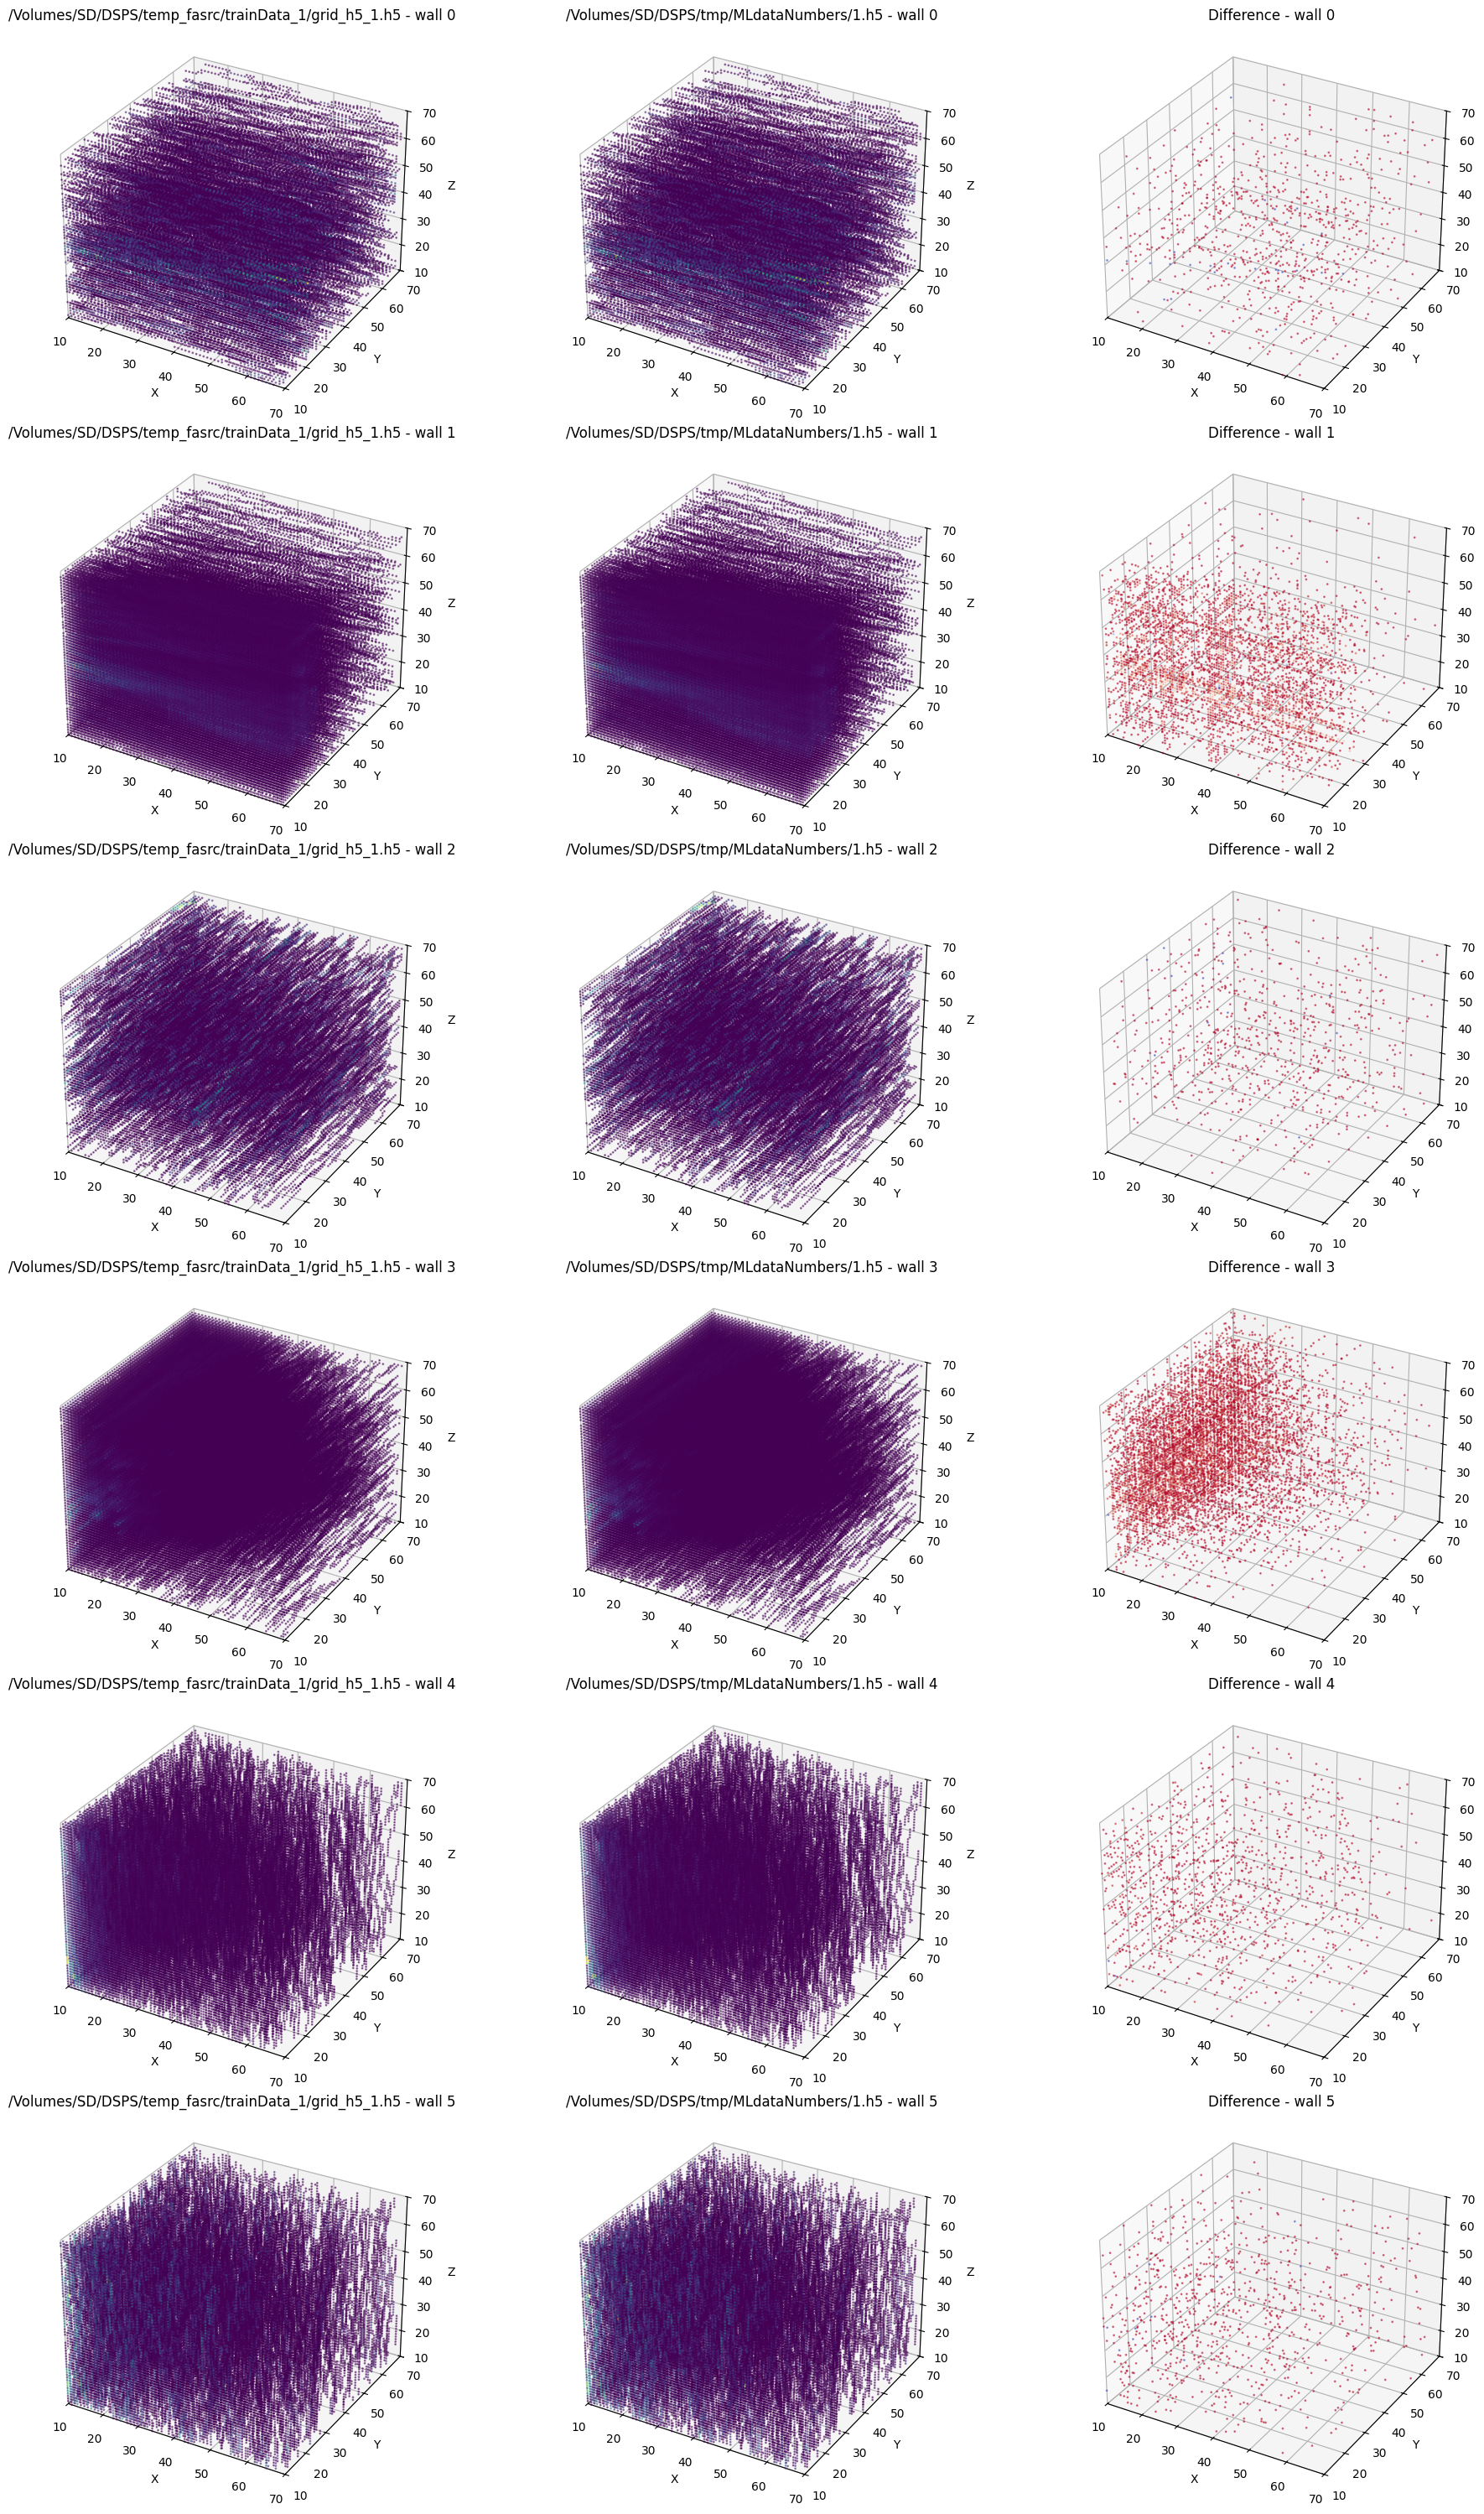

In [107]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

with h5py.File(file_1, 'r') as f1, h5py.File(file_2, 'r') as f2:
    # data is 'x'
    # label is 'y'
    x1 = f1['x'][:]
    y1 = f1['y'][:]
    x2 = f2['x'][:]
    y2 = f2['y'][:]

    # Check if the shapes match
    if x1.shape == x2.shape and y1.shape == y2.shape:
        print("Shapes match!")
    else:
        print("Shapes do not match!")
        print(f"x1 shape: {x1.shape}, x2 shape: {x2.shape}")
        print(f"y1 shape: {y1.shape}, y2 shape: {y2.shape}")

    # Check if the data matches
    if np.array_equal(x1, x2) and np.array_equal(y1, y2):
        print("Data matches!")
    else:
        print("Data does not match!")

        # Print the indices of mismatches and the values
        mismatches_x = np.where(x1 != x2)
        mismatches_y = np.where(y1 != y2)

        # for idx in zip(*mismatches_x):
        #     print(f"x mismatch at index {idx}: {x1[idx]} != {x2[idx]}")
        # for idx in zip(*mismatches_y):
        #     print(f"y mismatch at index {idx}: {y1[idx]} != {y2[idx]}")

    # Plotting the data (4d)
    fig, axes = plt.subplots(x1.shape[0], 3, figsize=(20, 5 * x1.shape[0]), subplot_kw={'projection': '3d'})
    for i in range(x1.shape[0]):
        trim = 10 # Adjust this value to trim the edges of the plot
        trim_mask = np.zeros_like(x1[i], dtype=bool)
        trim_mask[trim:-trim, trim:-trim, trim:-trim] = True

        mask = x1[i] > 0
        mask &= trim_mask
        x, y, z = np.nonzero(mask)
        axes[i, 0].scatter(x, y, z, c=x1[i][mask], cmap='viridis', marker='o', s=1, alpha=0.5)
        axes[i, 0].set_title(f'{file_1} - wall {i}')

        mask = x2[i] > 0
        mask &= trim_mask
        x, y, z = np.nonzero(mask)
        axes[i, 1].scatter(x, y, z, c=x2[i][mask], cmap='viridis', marker='o', s=1, alpha=0.5)
        axes[i, 1].set_title(f'{file_2} - wall {i}')

        # Plotting the difference
        diff = x1[i] - x2[i]
        mask = diff != 0
        mask &= trim_mask
        x, y, z = np.nonzero(mask)
        axes[i, 2].scatter(x, y, z, c=diff[mask], cmap='coolwarm', marker='o', s=1, alpha=0.5)
        axes[i, 2].set_title(f'Difference - wall {i}')

        # Set labels for the axes
        axes[i, 0].set_xlabel('X')
        axes[i, 0].set_ylabel('Y')
        axes[i, 0].set_zlabel('Z')
        axes[i, 1].set_xlabel('X')
        axes[i, 1].set_ylabel('Y')
        axes[i, 1].set_zlabel('Z')
        axes[i, 2].set_xlabel('X')
        axes[i, 2].set_ylabel('Y')
        axes[i, 2].set_zlabel('Z')

        # Set the limits for the axes
        axes[i, 0].set_xlim(trim, x1.shape[1] - trim)
        axes[i, 0].set_ylim(trim, x1.shape[2] - trim)
        axes[i, 0].set_zlim(trim, x1.shape[3] - trim)
        axes[i, 1].set_xlim(trim, x2.shape[1] - trim)
        axes[i, 1].set_ylim(trim, x2.shape[2] - trim)
        axes[i, 1].set_zlim(trim, x2.shape[3] - trim)
        axes[i, 2].set_xlim(trim, x1.shape[1] - trim)
        axes[i, 2].set_ylim(trim, x1.shape[2] - trim)
        axes[i, 2].set_zlim(trim, x1.shape[3] - trim)
    
    plt.tight_layout()
    plt.show()

# Multiple Files

In [20]:
numbers = list(range(0, 10))
print(numbers)

for number in numbers:
    file_1 = f'/Volumes/SD/DSPS/temp_fasrc/trainData_1/grid_h5_{number}.h5'
    file_2 = f'/Volumes/SD/DSPS/tmp/MLdataNumbers/{number}.h5'

    with h5py.File(file_1, 'r') as f1, h5py.File(file_2, 'r') as f2:
        # data is 'x'
        # label is 'y'
        x1 = f1['x'][:]
        y1 = f1['y'][:]
        x2 = f2['x'][:]
        y2 = f2['y'][:]

        # print(f"File {number}:")
        # print(f"x1 shape: {x1.shape}, y1 shape: {y1.shape}")
        # print(f"x2 shape: {x2.shape}, y2 shape: {y2.shape}")

        # Check if the shapes match
        if x1.shape == x2.shape and y1.shape == y2.shape:
            # print("Shapes match!")
            pass
        else:
            print("Shapes do not match!")

        # Check if the contents match
        if (x1 == x2).all() and (y1 == y2).all():
            # print("Contents match!")
            pass
        else:
            print(f"Contents do not match for file {number}!")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Contents do not match for file 0!
Contents do not match for file 1!
Contents do not match for file 2!
Contents do not match for file 3!
Contents do not match for file 4!
Contents do not match for file 5!
Contents do not match for file 6!
Contents do not match for file 7!
Contents do not match for file 8!
Contents do not match for file 9!
